In [4]:
import numpy as np
import pandas as pd
import os
import soundfile as sf
from matplotlib import pyplot as plt
import librosa

data_path = os.path.dirname(os.getcwd())


In [5]:
a = data_path+'\data\ASVspoof2019_LA_protocols\ASVspoof2019.LA.cm.train.trn.txt'
LA_label_train = pd.read_csv(a,sep=' ')
LA_label_train = LA_label_train.drop(['-'], axis=1)

a = data_path+'\data\ASVspoof2019_LA_protocols\ASVspoof2019.LA.cm.dev.trl.txt'
LA_label_dev = pd.read_csv(a,sep=' ')
LA_label_dev = LA_label_dev.drop(['-'], axis=1)

In [6]:
LA_label_train.head()

,SPEAKER_ID,AUDIO_FILE_NAME,SYSTEM_ID,KEY
0,LA_0079,LA_T_1138215,-,bonafide
1,LA_0079,LA_T_1271820,-,bonafide
2,LA_0079,LA_T_1272637,-,bonafide
3,LA_0079,LA_T_1276960,-,bonafide
4,LA_0079,LA_T_1341447,-,bonafide


In [7]:
path = data_path+'\\data\\ASVspoof2019_LA_train\\flac'

y, sr = sf.read(path+'\\'+LA_label_train['AUDIO_FILE_NAME'][10]+'.flac')     
feat = librosa.feature.mfcc(y=y, sr=sr)


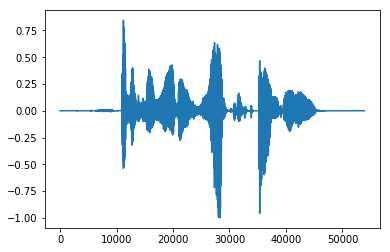

In [8]:
plt.plot(y)

In [10]:
training_epochs = 50
n_dim = tr_features.shape[1]
n_classes = 2
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.01

In [11]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)

W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], 
mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)

W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.initialize_all_variables()

(20, 106)

In [ ]:
cost_function = -tf.reduce_sum(Y * tf.log(y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))